In [1]:
import torch

In [63]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [64]:
x.requires_grad_(True)
x.grad

In [71]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [72]:
y.backward()
x.grad

tensor([ 0., 16., 32., 48.])

In [7]:
x.grad == 4 * x

tensor([True, True, True, True])

In [9]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [10]:
x.grad.zero_()
y = x * x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [24]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [25]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

In [94]:
def f(a):
    print(a)
    b = a * 2
    print(b)
    while b.norm() < 1000:
        print('bnorm:', b.norm())
        b = b * 2
        print('b:', b)
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [99]:
a = torch.randn(size=(), requires_grad=True)
print(a)
d = f(a)
d.backward()
d

tensor(-0.3499, requires_grad=True)
tensor(-0.3499, requires_grad=True)
tensor(-0.6997, grad_fn=<MulBackward0>)
bnorm: tensor(0.6997, grad_fn=<NormBackward0>)
b: tensor(-1.3994, grad_fn=<MulBackward0>)
bnorm: tensor(1.3994, grad_fn=<NormBackward0>)
b: tensor(-2.7988, grad_fn=<MulBackward0>)
bnorm: tensor(2.7988, grad_fn=<NormBackward0>)
b: tensor(-5.5977, grad_fn=<MulBackward0>)
bnorm: tensor(5.5977, grad_fn=<NormBackward0>)
b: tensor(-11.1954, grad_fn=<MulBackward0>)
bnorm: tensor(11.1954, grad_fn=<NormBackward0>)
b: tensor(-22.3908, grad_fn=<MulBackward0>)
bnorm: tensor(22.3908, grad_fn=<NormBackward0>)
b: tensor(-44.7815, grad_fn=<MulBackward0>)
bnorm: tensor(44.7815, grad_fn=<NormBackward0>)
b: tensor(-89.5630, grad_fn=<MulBackward0>)
bnorm: tensor(89.5630, grad_fn=<NormBackward0>)
b: tensor(-179.1260, grad_fn=<MulBackward0>)
bnorm: tensor(179.1260, grad_fn=<NormBackward0>)
b: tensor(-358.2521, grad_fn=<MulBackward0>)
bnorm: tensor(358.2521, grad_fn=<NormBackward0>)
b: tensor(-716.

tensor(-143300.8281, grad_fn=<MulBackward0>)

In [100]:
a.grad == d / a

tensor(409600.)


In [61]:
d = f(a)

In [62]:
a.grad

tensor(512.)

In [73]:
import numpy as np
from d2l import torch as d2l

In [83]:
x = np.linspace(- np.pi,np.pi,100)
x

array([-3.14159265, -3.07812614, -3.01465962, -2.9511931 , -2.88772658,
       -2.82426006, -2.76079354, -2.69732703, -2.63386051, -2.57039399,
       -2.50692747, -2.44346095, -2.37999443, -2.31652792, -2.2530614 ,
       -2.18959488, -2.12612836, -2.06266184, -1.99919533, -1.93572881,
       -1.87226229, -1.80879577, -1.74532925, -1.68186273, -1.61839622,
       -1.5549297 , -1.49146318, -1.42799666, -1.36453014, -1.30106362,
       -1.23759711, -1.17413059, -1.11066407, -1.04719755, -0.98373103,
       -0.92026451, -0.856798  , -0.79333148, -0.72986496, -0.66639844,
       -0.60293192, -0.53946541, -0.47599889, -0.41253237, -0.34906585,
       -0.28559933, -0.22213281, -0.1586663 , -0.09519978, -0.03173326,
        0.03173326,  0.09519978,  0.1586663 ,  0.22213281,  0.28559933,
        0.34906585,  0.41253237,  0.47599889,  0.53946541,  0.60293192,
        0.66639844,  0.72986496,  0.79333148,  0.856798  ,  0.92026451,
        0.98373103,  1.04719755,  1.11066407,  1.17413059,  1.23

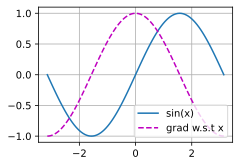

In [89]:
x = torch.tensor(x, requires_grad=True)
y = torch.sin(x)
for i in range(100):
    y[i].backward(retain_graph = True)

d2l.plot(x.detach(),(y.detach(),x.grad),legend = (('sin(x)', 'grad w.s.t x')))

In [115]:
x = torch.tensor(np.linspace(- np.pi,np.pi,100), requires_grad=True)
y = torch.sin(x)
x, y

(tensor([-3.1416, -3.0781, -3.0147, -2.9512, -2.8877, -2.8243, -2.7608, -2.6973,
         -2.6339, -2.5704, -2.5069, -2.4435, -2.3800, -2.3165, -2.2531, -2.1896,
         -2.1261, -2.0627, -1.9992, -1.9357, -1.8723, -1.8088, -1.7453, -1.6819,
         -1.6184, -1.5549, -1.4915, -1.4280, -1.3645, -1.3011, -1.2376, -1.1741,
         -1.1107, -1.0472, -0.9837, -0.9203, -0.8568, -0.7933, -0.7299, -0.6664,
         -0.6029, -0.5395, -0.4760, -0.4125, -0.3491, -0.2856, -0.2221, -0.1587,
         -0.0952, -0.0317,  0.0317,  0.0952,  0.1587,  0.2221,  0.2856,  0.3491,
          0.4125,  0.4760,  0.5395,  0.6029,  0.6664,  0.7299,  0.7933,  0.8568,
          0.9203,  0.9837,  1.0472,  1.1107,  1.1741,  1.2376,  1.3011,  1.3645,
          1.4280,  1.4915,  1.5549,  1.6184,  1.6819,  1.7453,  1.8088,  1.8723,
          1.9357,  1.9992,  2.0627,  2.1261,  2.1896,  2.2531,  2.3165,  2.3800,
          2.4435,  2.5069,  2.5704,  2.6339,  2.6973,  2.7608,  2.8243,  2.8877,
          2.9512,  3.0147,  

In [116]:
for i in range(100):
    y[i].backward(retain_graph=True)
x.grad

tensor([-1.0000, -0.9980, -0.9920, -0.9819, -0.9679, -0.9501, -0.9284, -0.9029,
        -0.8738, -0.8413, -0.8053, -0.7660, -0.7237, -0.6785, -0.6306, -0.5801,
        -0.5272, -0.4723, -0.4154, -0.3569, -0.2969, -0.2358, -0.1736, -0.1108,
        -0.0476,  0.0159,  0.0792,  0.1423,  0.2048,  0.2665,  0.3271,  0.3863,
         0.4441,  0.5000,  0.5539,  0.6056,  0.6549,  0.7015,  0.7453,  0.7861,
         0.8237,  0.8580,  0.8888,  0.9161,  0.9397,  0.9595,  0.9754,  0.9874,
         0.9955,  0.9995,  0.9995,  0.9955,  0.9874,  0.9754,  0.9595,  0.9397,
         0.9161,  0.8888,  0.8580,  0.8237,  0.7861,  0.7453,  0.7015,  0.6549,
         0.6056,  0.5539,  0.5000,  0.4441,  0.3863,  0.3271,  0.2665,  0.2048,
         0.1423,  0.0792,  0.0159, -0.0476, -0.1108, -0.1736, -0.2358, -0.2969,
        -0.3569, -0.4154, -0.4723, -0.5272, -0.5801, -0.6306, -0.6785, -0.7237,
        -0.7660, -0.8053, -0.8413, -0.8738, -0.9029, -0.9284, -0.9501, -0.9679,
        -0.9819, -0.9920, -0.9980, -1.00